In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from aughs import shrink_forest

In [2]:
def preprocess(df):
    # Extract relevant columns
    categorical_columns = ["Sex", "Embarked"]
    numerical_columns = ["Age", "Fare", "Pclass", "Parch", "PassengerId"]
    feat_columns = categorical_columns + numerical_columns

    # Ordinal encode categorical columns
    df[categorical_columns] = OrdinalEncoder().fit_transform(df[categorical_columns])

    # Impute/drop missing values
    df.loc[:, "Age"].fillna(df["Age"].mean(), inplace=True)
    df = df.dropna()
    
    X_df = df.loc[:, feat_columns]
    y_df = df.loc[:, "Survived"]

    return X_df, y_df

In [3]:
def plot_importances(model, X_df, title):
    importances = pd.Series(model.feature_importances_, index=X_df.columns)
    importances.sort_values().plot(kind="barh", figsize=(8, 6), title=title)

In [4]:
df = pd.read_csv("../raw_data/titanic/titanic_train.csv")
X_df, y_df = preprocess(df)
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_df, y_df)

RandomForestClassifier(random_state=1)

In [5]:
rf_shrink = shrink_forest(rf, shrink_mode="hs", lmb=20, X_train=X_df)
rf_shrink_ent = shrink_forest(rf, shrink_mode="hs_entropy", lmb=20, X_train=X_df)
rf_shrink_card = shrink_forest(rf, shrink_mode="hs_log_cardinality", lmb=20, X_train=X_df)

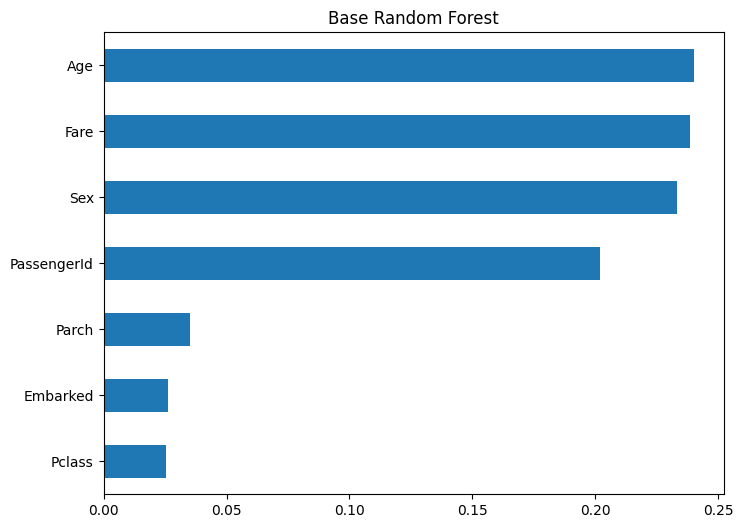

In [6]:
plot_importances(rf, X_df, "Base Random Forest")

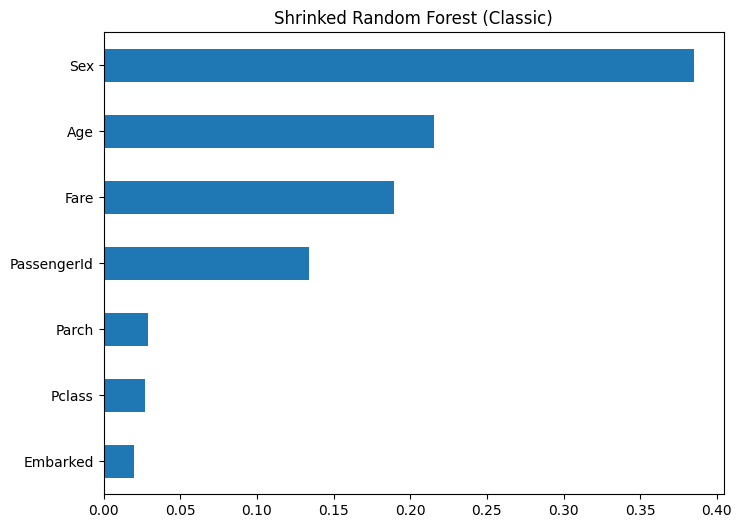

In [7]:
plot_importances(rf_shrink, X_df, "Shrinked Random Forest (Classic)")

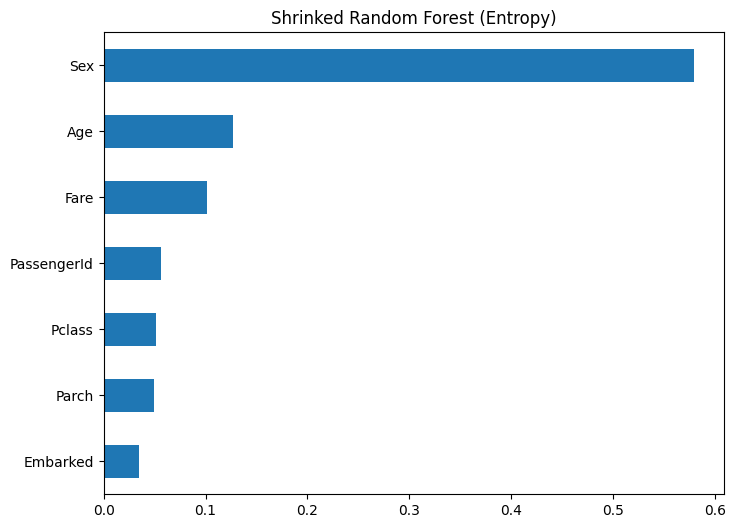

In [8]:
plot_importances(rf_shrink_ent, X_df, "Shrinked Random Forest (Entropy)")

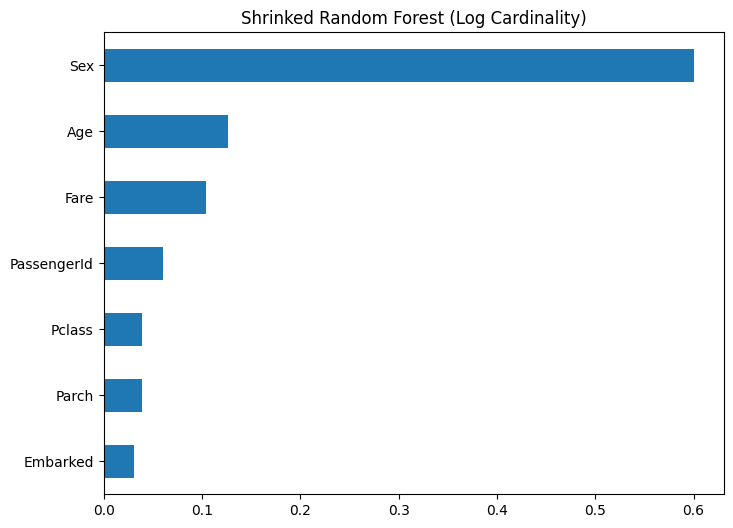

In [9]:
plot_importances(rf_shrink_card, X_df, "Shrinked Random Forest (Log Cardinality)")